In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league/PremierLeague.csv
/kaggle/input/premier-league/2024-2025 fixtures processed.csv
/kaggle/input/premier-league/2024-2025 fixtures.csv
/kaggle/input/arsenal-under-artata/arsenal_data_since_2019.csv


In [2]:
epl = pd.read_csv("/kaggle/input/premier-league/PremierLeague.csv")
epl.head(10)


,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,1993-1994_Arsenal_Coventry,1993-1994,1,1993-08-14,NaN,Arsenal,Coventry,0,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
1,1993-1994_Aston Villa_QPR,1993-1994,1,1993-08-14,NaN,Aston Villa,QPR,4,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,1993-1994_Chelsea_Blackburn,1993-1994,1,1993-08-14,NaN,Chelsea,Blackburn,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,1993-1994_Liverpool_Sheffield Weds,1993-1994,1,1993-08-14,NaN,Liverpool,Sheffield Weds,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
4,1993-1994_Man City_Leeds,1993-1994,1,1993-08-14,NaN,Man City,Leeds,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
5,1993-1994_Newcastle_Tottenham,1993-1994,1,1993-08-14,NaN,Newcastle,Tottenham,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
6,1993-1994_Oldham_Ipswich,1993-1994,1,1993-08-14,NaN,Oldham,Ipswich,0,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
7,1993-1994_Sheffield United_Swindon,1993-1994,1,1993-08-14,NaN,Sheffield United,Swindon,3,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
8,1993-1994_Southampton_Everton,1993-1994,1,1993-08-14,NaN,Southampton,Everton,0,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
9,1993-1994_West Ham_Wimbledon,1993-1994,1,1993-08-14,NaN,West Ham,Wimbledon,0,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3


# Arsenal Under Arteta

## Getting all Arsenal data scince 20 December 2019

In [3]:
epl['Date'] = pd.to_datetime(epl['Date'])
epl.head()
arsenal_data = epl[(epl['HomeTeam'] == 'Arsenal') | (epl['AwayTeam'] == 'Arsenal')]
arsenal_data_since_2019 = arsenal_data[arsenal_data['Date'] >= pd.to_datetime('2019-12-20')]
arsenal_data_since_2019.to_csv('arsenal_data_since_2019.csv', index=False)
arsenal_data_since_2019.head() # or display(arsenal_data_since_2019)

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
10050,2019-2020_Everton_Arsenal,2019-2020,18,2019-12-21,12:30,Everton,Arsenal,0,0,D,...,3.00,2.33,3.75,2.90,1.61,2.55,1.57,2.40,1,1
10061,2019-2020_Bournemouth_Arsenal,2019-2020,19,2019-12-26,15:00,Bournemouth,Arsenal,1,1,D,...,2.08,3.50,3.85,2.01,1.59,2.55,1.55,2.43,1,1
10076,2019-2020_Arsenal_Chelsea,2019-2020,20,2019-12-29,14:00,Arsenal,Chelsea,1,2,A,...,2.45,2.86,3.73,2.35,1.59,2.63,1.53,2.48,0,3
10087,2019-2020_Arsenal_Man United,2019-2020,21,2020-01-01,20:00,Arsenal,Man United,2,0,H,...,2.70,2.58,3.64,2.61,1.69,2.35,1.64,2.26,3,0
10090,2019-2020_Crystal Palace_Arsenal,2019-2020,22,2020-01-11,12:30,Crystal Palace,Arsenal,1,1,D,...,1.90,4.19,3.87,1.83,1.88,2.12,1.80,2.03,1,1


## Separating Home games and Away games under Mickel Arteta
## Total number of Home Wins
## Total number of Away Wins
## Total number of home Draw 
## Total number of Away draw
## Total number of Home Losses
## Total number of Away Losses

In [4]:


arsenal_home_games = arsenal_data_since_2019[arsenal_data_since_2019['HomeTeam'] == 'Arsenal']
arsenal_away_games = arsenal_data_since_2019[arsenal_data_since_2019['AwayTeam'] == 'Arsenal']
# Calculate wins, draws, and losses using arsenal_data_since_2019
home_wins = len(arsenal_home_games[arsenal_home_games['FullTimeResult'] == 'H'])
away_wins = len(arsenal_away_games[arsenal_away_games['FullTimeResult'] == 'A'])
home_draws = len(arsenal_home_games[arsenal_home_games['FullTimeResult'] == 'D'])
away_draws = len(arsenal_away_games[arsenal_away_games['FullTimeResult'] == 'D'])
home_losses = len(arsenal_home_games[arsenal_home_games['FullTimeResult'] == 'A'])
away_losses = len(arsenal_away_games[arsenal_away_games['FullTimeResult'] == 'H'])

# Print the results
print("Total Number of Home Wins:", home_wins)
print("Total Number of Away Wins:", away_wins)
print("Total Number of Home Draws:", home_draws)
print("Total Number of Away Draws:", away_draws)
print("Total Number of Home Losses:", home_losses)
print("Total Number of Away Losses:", away_losses)



Total Number of Home Wins: 68
Total Number of Away Wins: 55
Total Number of Home Draws: 19
Total Number of Away Draws: 23
Total Number of Home Losses: 18
Total Number of Away Losses: 28


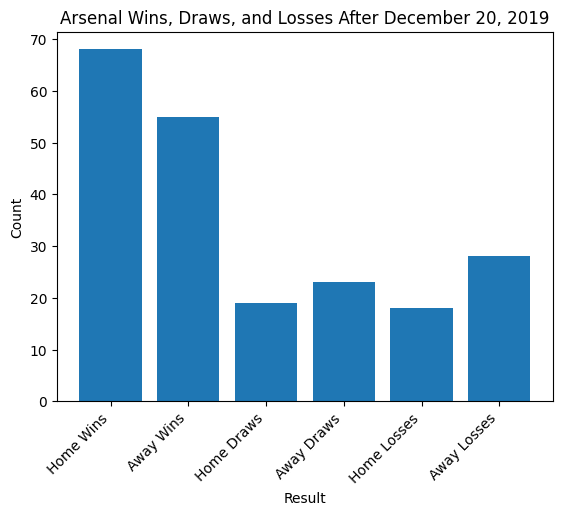

In [5]:
###Bar chart of Home Away game

import matplotlib.pyplot as plt

# Data for the bar chart
labels = ['Home Wins', 'Away Wins', 'Home Draws', 'Away Draws', 'Home Losses', 'Away Losses']
values = [home_wins, away_wins, home_draws, away_draws, home_losses, away_losses]

# Create the bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Arsenal Wins, Draws, and Losses After December 20, 2019')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()

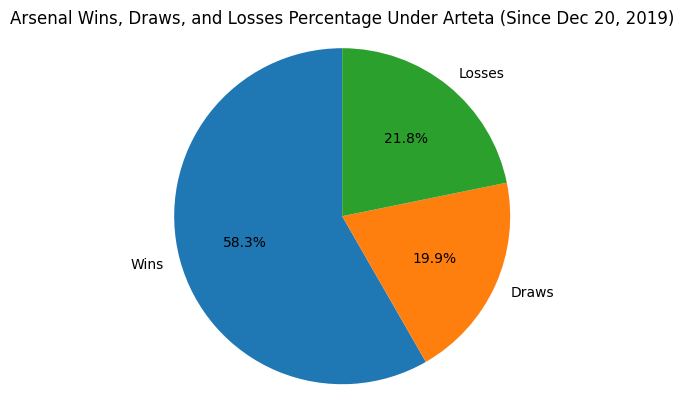

In [6]:
import matplotlib.pyplot as plt

# Calculate total wins and draws
total_wins = home_wins + away_wins
total_draws = home_draws + away_draws

# Data for the pie chart
labels = ['Wins', 'Draws', 'Losses']
sizes = [total_wins, total_draws, home_losses + away_losses] 

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Ensure the circle's proportion
plt.axis('equal') 

# Add a title
plt.title('Arsenal Wins, Draws, and Losses Percentage Under Arteta (Since Dec 20, 2019)')

# Display the chart
plt.show()

In [7]:
arsenal_under_arteta = pd.read_csv('arsenal_data_since_2019.csv')
arsenal_under_arteta.head(-5)

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,2019-2020_Everton_Arsenal,2019-2020,18,2019-12-21,12:30,Everton,Arsenal,0,0,D,...,3.00,2.33,3.75,2.90,1.61,2.55,1.57,2.40,1,1
1,2019-2020_Bournemouth_Arsenal,2019-2020,19,2019-12-26,15:00,Bournemouth,Arsenal,1,1,D,...,2.08,3.50,3.85,2.01,1.59,2.55,1.55,2.43,1,1
2,2019-2020_Arsenal_Chelsea,2019-2020,20,2019-12-29,14:00,Arsenal,Chelsea,1,2,A,...,2.45,2.86,3.73,2.35,1.59,2.63,1.53,2.48,0,3
3,2019-2020_Arsenal_Man United,2019-2020,21,2020-01-01,20:00,Arsenal,Man United,2,0,H,...,2.70,2.58,3.64,2.61,1.69,2.35,1.64,2.26,3,0
4,2019-2020_Crystal Palace_Arsenal,2019-2020,22,2020-01-11,12:30,Crystal Palace,Arsenal,1,1,D,...,1.90,4.19,3.87,1.83,1.88,2.12,1.80,2.03,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2024-2025_Arsenal_Chelsea,2024-2025,29,2025-03-16,13:30,Arsenal,Chelsea,1,0,H,...,4.60,1.81,3.74,4.44,1.93,1.98,1.88,1.94,3,0
202,2024-2025_Arsenal_Fulham,2024-2025,30,2025-04-01,19:45,Arsenal,Fulham,2,1,H,...,9.00,1.48,4.20,7.73,2.17,1.78,2.12,1.74,3,0
203,2024-2025_Everton_Arsenal,2024-2025,31,2025-04-05,12:30,Everton,Arsenal,1,1,D,...,1.81,5.15,3.44,1.78,2.44,1.66,2.36,1.59,1,1
204,2024-2025_Arsenal_Brentford,2024-2025,32,2025-04-12,17:30,Arsenal,Brentford,1,1,D,...,5.50,1.61,4.16,5.35,1.82,2.12,1.77,2.06,1,1


# Arsenal total goal distribution Under Mikel Arteta
## Total Goal scored 
## Total goals conceded
## Percentage of win and loss goal advantage or disadvantage

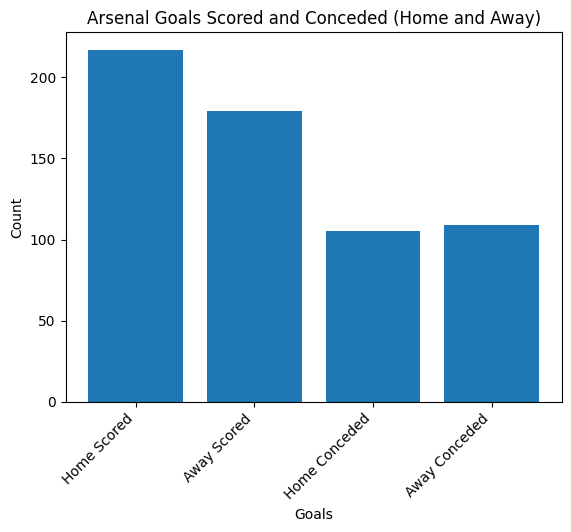

Total number of goals scored at home 217
Total number of goals scored Away form home 179


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate total goals scored and conceded
home_goals_scored = arsenal_home_games['FullTimeHomeTeamGoals'].sum()
away_goals_scored = arsenal_away_games['FullTimeAwayTeamGoals'].sum()
home_goals_conceded = arsenal_home_games['FullTimeAwayTeamGoals'].sum()
away_goals_conceded = arsenal_away_games['FullTimeHomeTeamGoals'].sum()

# Data for the bar chart
labels = ['Home Scored', 'Away Scored', 'Home Conceded', 'Away Conceded']
values = [home_goals_scored, away_goals_scored, home_goals_conceded, away_goals_conceded]

# Create the bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel('Goals')
plt.ylabel('Count')
plt.title('Arsenal Goals Scored and Conceded (Home and Away)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()
print("Total number of goals scored at home",home_goals_scored)
print("Total number of goals scored Away form home",away_goals_scored)

GoalDifference
1    48
2    42
3    15
4     9
5     7
6     2
Name: GoalDifference, dtype: int64


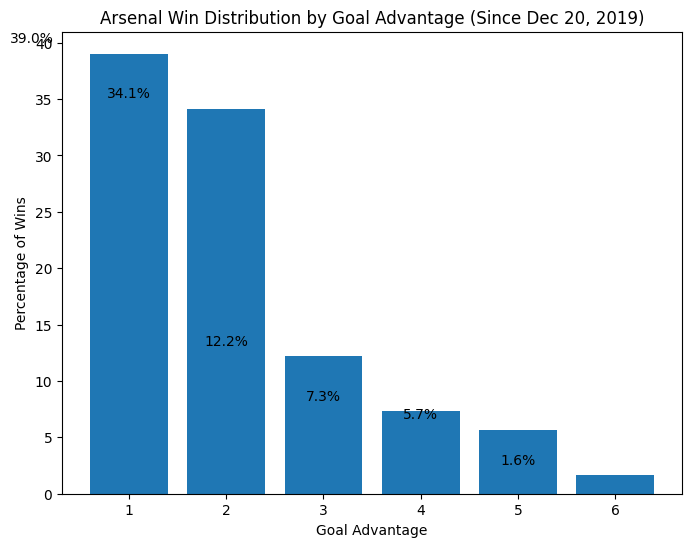

In [9]:
# Create an explicit copy of the slice using .copy()
arsenal_wins = arsenal_data_since_2019[
    (arsenal_data_since_2019['HomeTeam'] == 'Arsenal') & (arsenal_data_since_2019['FullTimeResult'] == 'H') |
    (arsenal_data_since_2019['AwayTeam'] == 'Arsenal') & (arsenal_data_since_2019['FullTimeResult'] == 'A')
].copy()  # Create a copy here

# Now you can safely use .loc
arsenal_wins.loc[:, 'GoalDifference'] = abs(arsenal_wins['FullTimeHomeTeamGoals'] - arsenal_wins['FullTimeAwayTeamGoals'])

# Group by goal difference and count occurrences
goal_advantage_counts = arsenal_wins.groupby('GoalDifference')['GoalDifference'].count()

# Print the results
print(goal_advantage_counts)
# Calculate percentages
goal_advantage_percentages = goal_advantage_counts / goal_advantage_counts.sum() * 100

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(goal_advantage_percentages.index, goal_advantage_percentages.values)

# Add labels and title
plt.xlabel('Goal Advantage')
plt.ylabel('Percentage of Wins')
plt.title('Arsenal Win Distribution by Goal Advantage (Since Dec 20, 2019)')

# Add percentage labels on top of bars
for i, v in enumerate(goal_advantage_percentages.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

# Display the chart
plt.show()

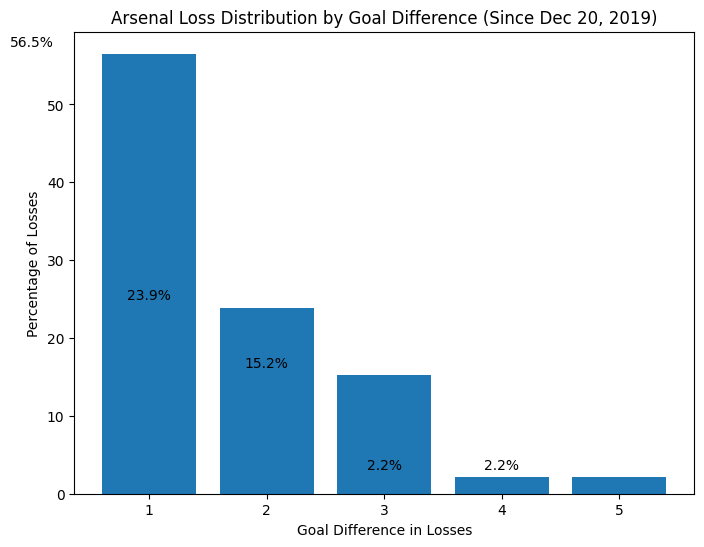

GoalDifference
1    26
2    11
3     7
4     1
5     1
Name: GoalDifference, dtype: int64


In [10]:
# Filter for Arsenal losses
arsenal_losses = arsenal_data_since_2019[
    (arsenal_data_since_2019['HomeTeam'] == 'Arsenal') & (arsenal_data_since_2019['FullTimeResult'] == 'A') |
    (arsenal_data_since_2019['AwayTeam'] == 'Arsenal') & (arsenal_data_since_2019['FullTimeResult'] == 'H')
].copy()  # Create a copy

# Calculate goal difference using .loc
arsenal_losses.loc[:, 'GoalDifference'] = abs(arsenal_losses['FullTimeHomeTeamGoals'] - arsenal_losses['FullTimeAwayTeamGoals'])

# Group by goal difference and count occurrences
loss_goal_diff_counts = arsenal_losses.groupby('GoalDifference')['GoalDifference'].count()

# Calculate percentages
loss_goal_diff_percentages = loss_goal_diff_counts / loss_goal_diff_counts.sum() * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(loss_goal_diff_percentages.index, loss_goal_diff_percentages.values)

# Add labels and title
plt.xlabel('Goal Difference in Losses')
plt.ylabel('Percentage of Losses')
plt.title('Arsenal Loss Distribution by Goal Difference (Since Dec 20, 2019)')

# Add percentage labels on top of bars
for i, v in enumerate(loss_goal_diff_percentages.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

# Display the chart
plt.show()
print(loss_goal_diff_counts)